# DAA Lab - Practical - 1
## Name : Aman Joharapurkar 
## Roll No : A-32

### Aim :
Write a program read the file and find Minimum and Maximum using Brute force approach. Also propose
and implement an improved algorithm based on Divide and Conquer Strategy.
Also calculate the time taken by both the algotihm.

Compute the time complexity of      
i) Brute force algorithm     
ii) Divide and Conquer based algorithm      
iii) Plot a graph to show the time comparison between algorithms




In [272]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

In [273]:
def MaxMin(A,n):
    max_v = A[0]
    min_v = A[0]
    for i in range (1,n):
        if A[i] > max_v :
            max_v = A[i]
        elif A[i] < min_v :
            min_v = A[i]
            
    return max_v,min_v

In [274]:
def MaxMinDAC(A, left, right):
    if left == right:
        return [A[left], A[right]]
    
    elif left + 1 == right:
        if A[left] > A[right]:
            return [A[left], A[right]]
        else:
            return [A[right], A[left]]
        
    else:
        middle = (left + right) // 2
        left_max_min = MaxMinDAC(A, left, middle)
        right_max_min = MaxMinDAC(A, middle + 1, right)
        
        max_value = max(left_max_min[0], right_max_min[0])
        min_value = min(left_max_min[1], right_max_min[1])
        
        return [max_value, min_value]

### For test1.csv :

In [317]:
df = pd.read_csv('test1.csv')

In [318]:
df.head()

,Date,Open,High,Low,val,Volume
0,09-01-2022,35.20,36.18,35.07,35.66,"92,505"
1,08/31/2022,36.65,36.87,35.04,35.41,"2,04,807"
2,08/30/2022,37.13,37.13,36.38,36.43,"1,13,552"
3,08/29/2022,37.10,37.30,36.66,37.01,"64,626"
4,08/26/2022,38.03,38.36,37.43,37.52,"87,895"


### Aim : To calculate maximum and minimum volume in the above data set by $Brute Force$ Approach

In [319]:
volume = df.iloc[:,-1]

In [320]:
print(volume)

0       92,505
1     2,04,807
2     1,13,552
3       64,626
4       87,895
5       46,951
6       70,144
7       71,610
8     1,05,002
9     1,18,481
10      69,637
11    1,27,201
12    1,24,722
13    1,75,105
14      86,967
15      85,721
16    1,08,353
17      72,583
18    1,64,875
19    1,84,548
20    1,43,977
21    1,89,742
22    2,33,698
Name: Volume, dtype: object


In [328]:
a = np.array(volume)
print(a)
volume_data = [int(s.replace(',', '')) for s in volume]

['92,505' '2,04,807' '1,13,552' '64,626' '87,895' '46,951' '70,144'
 '71,610' '1,05,002' '1,18,481' '69,637' '1,27,201' '1,24,722' '1,75,105'
 '86,967' '85,721' '1,08,353' '72,583' '1,64,875' '1,84,548' '1,43,977'
 '1,89,742' '2,33,698']


In [322]:
print(volume_data)

[92505, 204807, 113552, 64626, 87895, 46951, 70144, 71610, 105002, 118481, 69637, 127201, 124722, 175105, 86967, 85721, 108353, 72583, 164875, 184548, 143977, 189742, 233698]


In [323]:
max_val,min_val = MaxMin(volume_data,len(volume_data))
print(f"Minimum Volume is : {min_val}, Maximum Volume is : {max_val}")

Minimum Volume is : 46951, Maximum Volume is : 233698


In [324]:
start = time.perf_counter()
MaxMin(volume_data,len(volume_data))
end = time.perf_counter()
timetaken_br1 = end - start
print("The time required for Brute Force approach is" ,timetaken_br1)

The time required for Brute Force approach is 0.0002106999745592475


### Now To calculate maximum and minimum volume in the above data set by $Divide and Conquer$ Approach

In [325]:
end_index = len(volume_data) - 1
ans = MaxMinDAC(volume_data,0,end_index)
print(f"Maximum Volume: {ans[0]}, Minimum Volume: {ans[1]}")

Maximum Volume: 233698, Minimum Volume: 46951


In [326]:
start = time.perf_counter()
MaxMinDAC(volume_data,0,end_index)
end = time.perf_counter()
timetaken_dac1 = end-start
print("The time required for DAC is" ,timetaken_dac1)

The time required for DAC is 0.0001821999903768301


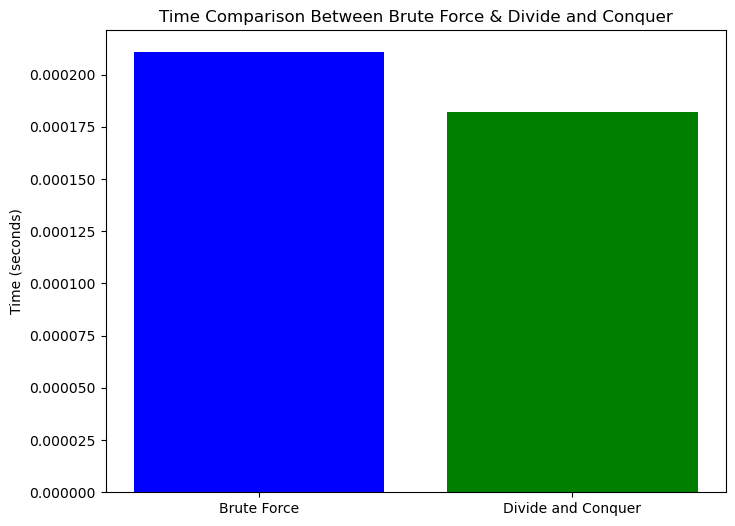

In [327]:
algo = ['Brute Force', 'Divide and Conquer']
times = [timetaken_br1, timetaken_dac1]
plt.figure(figsize=(8, 6))
plt.bar(algo, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Time Comparison Between Brute Force & Divide and Conquer')
plt.show()

### For test2.csv

In [286]:
df1 = pd.read_csv('test2.csv')
df1.head()

,key,fare_amount,pickup_datetime,val,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [287]:
fare = df1.iloc[:,1]
fare

0           4.5
1          16.9
2           5.7
3           7.7
4           5.3
           ... 
1019920     5.5
1019921    19.0
1019922     4.5
1019923     9.7
1019924     8.0
Name: fare_amount, Length: 1019925, dtype: float64

In [288]:
b = np.array(fare)
print(b)

[ 4.5 16.9  5.7 ...  4.5  9.7  8. ]


### Brute Force

In [289]:
max_val,min_val = MaxMin(b,len(b))
print(f"Minimum Fare is : {min_val}, Maximum Fare is : {max_val}")

Minimum Fare is : -44.9, Maximum Fare is : 500.0


In [290]:
start = time.perf_counter()
MaxMin(b,len(b) - 1)
end = time.perf_counter()
timetaken_br2 = end - start
print("The time required for Brute Force approach is" ,timetaken_br2)

The time required for Brute Force approach is 0.3028082000091672


### DAC

In [291]:
end_index = len(b) - 1
ans = MaxMinDAC(b,0,end_index)
print(f"Maximum Fare: {ans[0]}, Minimum Fare: {ans[1]}")

Maximum Fare: 500.0, Minimum Fare: -44.9


In [292]:
start = time.perf_counter()
MaxMinDAC(b,0,end_index)
end = time.perf_counter()
timetaken_dac2 = end-start
print("The time required for DAC is" ,timetaken_dac2)

The time required for DAC is 0.6464578000595793


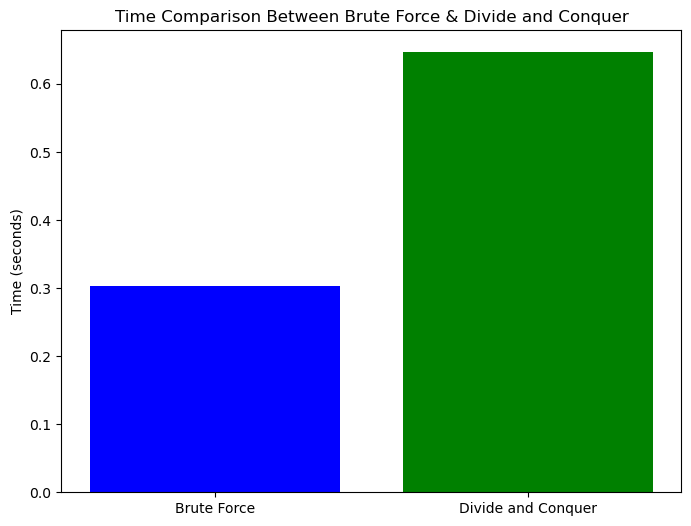

In [293]:
algo = ['Brute Force', 'Divide and Conquer']
times = [timetaken_br2, timetaken_dac2]
plt.figure(figsize=(8, 6))
plt.bar(algo, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Time Comparison Between Brute Force & Divide and Conquer')
plt.show()

### For test3.csv

In [294]:
df2 = pd.read_csv('test3.csv')
df2.head()

,date,open,high,low,val,volume,Name
0,08-02-2013,15.07,15.12,14.63,14.75,8407500,AAL
1,11-02-2013,14.89,15.01,14.26,14.46,8882000,AAL
2,12-02-2013,14.45,14.51,14.10,14.27,8126000,AAL
3,13-02-2013,14.30,14.94,14.25,14.66,10259500,AAL
4,14-02-2013,14.94,14.96,13.16,13.99,31879900,AAL


In [295]:
vol = df2.iloc[:,5]
vol

0          8407500
1          8882000
2          8126000
3         10259500
4         31879900
            ...   
619035     2982259
619036     2595187
619037     2962031
619038     4924323
619039     4534912
Name: volume, Length: 619040, dtype: int64

In [296]:
c = np.array(vol)
print(c)

[8407500 8882000 8126000 ... 2962031 4924323 4534912]


### Brute Force Approach

In [297]:
max_val,min_val = MaxMin(c,len(c))
print(f"Minimum Volume is : {min_val}, Maximum Volume is : {max_val}")

Minimum Volume is : 0, Maximum Volume is : 618237630


In [298]:
start = time.perf_counter()
MaxMin(c,len(c))
end = time.perf_counter()
timetaken_br3 = end - start
print("The time required for Brute Force approach is" ,timetaken_br3)

The time required for Brute Force approach is 0.1661040000617504


### DAC

In [299]:
end_index = len(c) - 1
ans = MaxMinDAC(c,0,end_index)
print(f"Maximum Fare: {ans[0]}, Minimum Fare: {ans[1]}")

Maximum Fare: 618237630, Minimum Fare: 0


In [300]:
start = time.perf_counter()
MaxMinDAC(c,0,end_index)
end = time.perf_counter()
timetaken_dac3 = end-start
print("The time required for DAC is" ,timetaken_dac3)

The time required for DAC is 0.3901297999545932


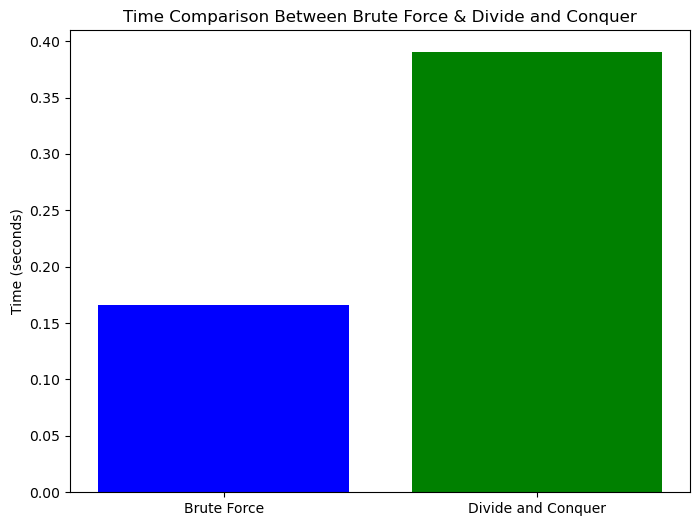

In [301]:
algo = ['Brute Force', 'Divide and Conquer']
times = [timetaken_br3, timetaken_dac3]
plt.figure(figsize=(8, 6))
plt.bar(algo, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Time Comparison Between Brute Force & Divide and Conquer')
plt.show()

### For test4.csv

In [302]:
df3 = pd.read_csv('test4.csv')
df3.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [303]:
val = df3.iloc[:,4]
val

0              5.0
1              5.0
2              5.0
3              5.0
4              5.0
            ...   
166321    236871.0
166322    237503.0
166323    237503.0
166324    238739.0
166325    239019.0
Name: total_cases, Length: 166326, dtype: float64

In [304]:
d = np.array(val)
print(d)

[5.00000e+00 5.00000e+00 5.00000e+00 ... 2.37503e+05 2.38739e+05
 2.39019e+05]


### Brute Force

In [305]:
max_val,min_val = MaxMin(d,len(d))
print(f"Minimum Value is : {min_val}, Maximum Value is : {max_val}")

Minimum Value is : 1.0, Maximum Value is : 445129499.0


In [306]:
start = time.perf_counter()
MaxMin(d,len(d))
end = time.perf_counter()
timetaken_br4 = end - start
print("The time required for Brute Force approach is" ,timetaken_br4)

The time required for Brute Force approach is 0.0526781000662595


### DAC

In [307]:
end_index = len(d) - 1
ans = MaxMinDAC(d,0,end_index)
print(f"Maximum Fare: {ans[0]}, Minimum Fare: {ans[1]}")

Maximum Fare: 445129499.0, Minimum Fare: 1.0


In [308]:
start = time.perf_counter()
MaxMinDAC(d,0,end_index)
end = time.perf_counter()
timetaken_dac4 = end-start
print("The time required for DAC is" ,timetaken_dac4)

The time required for DAC is 0.1148164999904111


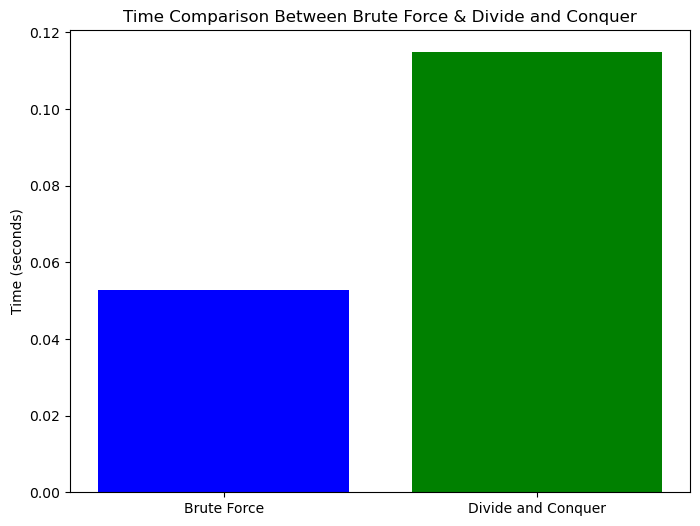

In [309]:
algo = ['Brute Force', 'Divide and Conquer']
times = [timetaken_br4, timetaken_dac4]
plt.figure(figsize=(8, 6))
plt.bar(algo, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Time Comparison Between Brute Force & Divide and Conquer')
plt.show()

### For data500.csv

In [329]:
df4 = pd.read_csv('data500.csv')
df4.head()

,numbers
0,255
1,78
2,768
3,187
4,481


In [330]:
e = np.array(df4)
print(e)

[[255]
 [ 78]
 [768]
 [187]
 [481]
 [ 53]
 [948]
 [760]
 [820]
 [532]
 [205]
 [998]
 [406]
 [ 12]
 [456]
 [624]
 [335]
 [135]
 [589]
 [623]
 [332]
 [327]
 [394]
 [106]
 [932]
 [899]
 [406]
 [895]
 [523]
 [612]
 [259]
 [786]
 [561]
 [ 80]
 [575]
 [935]
 [249]
 [680]
 [117]
 [825]
 [ 65]
 [325]
 [865]
 [931]
 [353]
 [541]
 [289]
 [405]
 [210]
 [721]
 [474]
 [706]
 [992]
 [931]
 [ 15]
 [797]
 [ 18]
 [936]
 [662]
 [840]
 [192]
 [719]
 [122]
 [936]
 [517]
 [228]
 [576]
 [675]
 [961]
 [814]
 [681]
 [134]
 [412]
 [638]
 [690]
 [523]
 [963]
 [994]
 [926]
 [824]
 [638]
 [495]
 [680]
 [  9]
 [317]
 [500]
 [850]
 [994]
 [454]
 [ 99]
 [334]
 [850]
 [249]
 [780]
 [635]
 [244]
 [318]
 [848]
 [352]
 [889]
 [791]
 [840]
 [570]
 [473]
 [220]
 [172]
 [338]
 [447]
 [392]
 [958]
 [905]
 [572]
 [365]
 [410]
 [736]
 [624]
 [392]
 [690]
 [112]
 [907]
 [ 90]
 [687]
 [650]
 [  4]
 [133]
 [804]
 [ 87]
 [501]
 [247]
 [600]
 [208]
 [198]
 [230]
 [338]
 [793]
 [527]
 [220]
 [459]
 [769]
 [ 27]
 [498]
 [322]
 [951]

### Brute Force

In [331]:
max_val,min_val = MaxMin(e,len(e))
print(f"Minimum Number is : {min_val}, Maximum Number is : {max_val}")

Minimum Number is : [4], Maximum Number is : [998]


In [332]:
start = time.perf_counter()
MaxMin(e,len(e))
end = time.perf_counter()
timetaken_br5 = end - start
print("The time required for Brute Force approach is" ,timetaken_br5)

The time required for Brute Force approach is 0.0016484999796375632


### DAC

In [333]:
end_index = len(e) - 1
ans = MaxMinDAC(e,0,end_index)
print(f"Maximum Number: {ans[0]}, Minimum Number: {ans[1]}")

Maximum Number: [998], Minimum Number: [4]


In [334]:
start = time.perf_counter()
MaxMinDAC(e,0,end_index)
end = time.perf_counter()
timetaken_dac5 = end-start
print("The time required for DAC is" ,timetaken_dac5)

The time required for DAC is 0.0023624999448657036


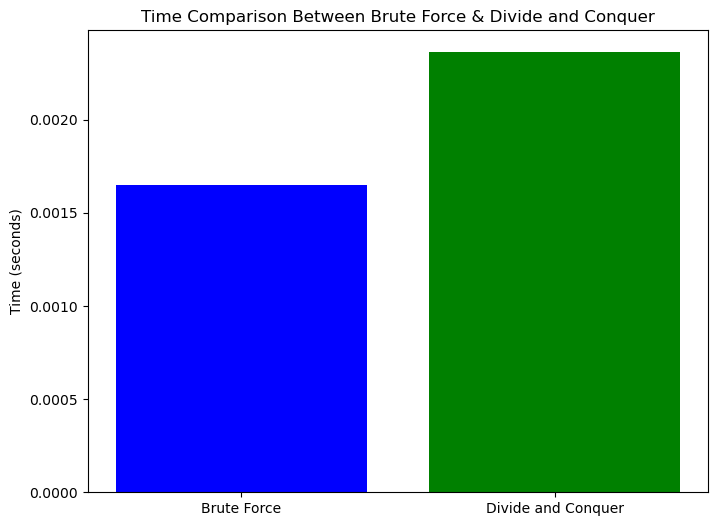

In [335]:
algo = ['Brute Force', 'Divide and Conquer']
times = [timetaken_br5, timetaken_dac5]
plt.figure(figsize=(8, 6))
plt.bar(algo, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Time Comparison Between Brute Force & Divide and Conquer')
plt.show()

#                  --------------------xxxx----------xxxx-----------xxxx----------------